Total marks:
 0      57.5890
1      69.3428
2      16.5990
3      79.3126
4      49.3366
5      52.4044
6      73.6920
7      48.2020
8      42.9624
9      20.4388
10     79.1526
11     60.3744
12     14.9736
13     62.0626
14     60.1080
15     48.8550
16     70.2880
17     51.4300
18     57.8462
19     15.0436
20     54.1244
21     65.1924
22     47.2054
23     65.3436
24     60.3310
25     79.2276
26     59.3296
27     42.4328
28     20.6856
29     63.2692
        ...   
548    47.2742
549    43.4166
550    50.0772
551    30.1580
552    43.6392
553    67.2316
554    85.4632
555    47.8996
556    59.2908
557    53.0292
558    14.2320
559    49.1732
560    61.9128
561    60.7874
562    66.3944
563    73.2922
564    60.4310
565    27.9380
566    59.6534
567    58.7904
568    28.4930
569    58.3768
570    32.2912
571    73.6978
572    88.4376
573    50.1440
574    58.7398
575    42.7518
576    52.6298
577    44.7538
Name: Total.marks, Length: 578, dtype: float64
Stat table:
          To

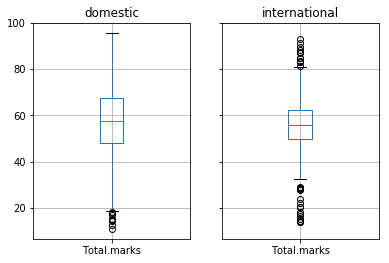

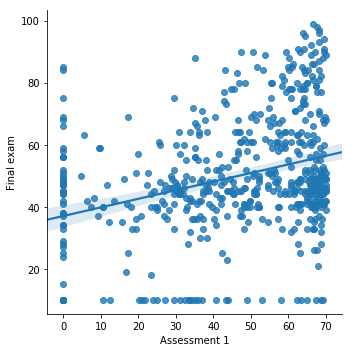

In [37]:
import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#------------ Part a ------------
dataset = pd.read_csv('student_results.csv')

#------------ Part b ------------
dataset = dataset.fillna(0)

#------------ Part c ------------
n = len(dataset)
FullMarks = pd.Series([70, 30, 70, 30, 30, 20, 30, 20, 30, 20, 50, 2, 100],
                        index = ['Assessment 1', 'Assessment 2', 'Online quiz 1 ', 
                                 'Online quiz 2', 'Online quiz 3', 'Online quiz 4',
                                 'Group assignment 1', 'Group assignment 2',
                                 'Assessment 3', 'Assessment 4', 'Group assignment 3',
                                 ' Group evaluation', 'Final exam'])
Weight = pd.Series([0.07, 0.03, 0.07, 0.03, 0.03, 0.02, 0.03, 0.02, 0.024, 0.016, 0.04, 0.02, 0.6],
                  index = ['Assessment 1', 'Assessment 2', 'Online quiz 1 ', 
                                 'Online quiz 2', 'Online quiz 3', 'Online quiz 4',
                                 'Group assignment 1', 'Group assignment 2',
                                 'Assessment 3', 'Assessment 4', 'Group assignment 3',
                                 ' Group evaluation', 'Final exam'])

dataset['Total.marks'] = (dataset.loc[0:n, ['Assessment 1', 'Assessment 2', 'Online quiz 1 ', 
                                 'Online quiz 2', 'Online quiz 3', 'Online quiz 4',
                                 'Group assignment 1', 'Group assignment 2',
                                 'Assessment 3', 'Assessment 4', 'Group assignment 3',
                                 ' Group evaluation', 'Final exam']] / FullMarks * Weight * 100).sum(1)
print('Total marks:\n', dataset['Total.marks'])

dataset.loc[0:n, ['Total.marks', 'Student category']].groupby('Student category').boxplot()

#------------ Part d ------------
Stat_table = dataset.loc[0:n, ['Total.marks', 'Class No']].groupby('Class No').agg({'mean', 'var', 'std'})
print('Stat table:\n', Stat_table)

#------------ Part e ------------
Details = ['Fail', 'Pass', 'Credit', 'Distinction', 'High Distinction']
Range = [0, 50, 65, 75, 85, 100.01]
dataset['Grade'] = pd.cut(dataset['Total.marks'], right = False, bins = Range, labels = Details)
print('Grade:\n', dataset['Grade'])

#------------ Part f ------------
slr = LinearRegression(fit_intercept = True)
x = dataset[['Assessment 1']]
y = dataset[['Final exam']]
slr.fit(x, y)
print('Simple linear regression coefficents:', slr.coef_)
print('Simple linear regression intercept:', slr.intercept_)
df_part_f = pd.DataFrame(dataset.loc[0:n, ['Final exam', 'Assessment 1']])
sb.lmplot("Assessment 1", "Final exam", df_part_f)

#------------ Part g ------------
x = dataset[['Assessment 1', 'Assessment 3', 'Online quiz 1 ', 'Group assignment 2']]
y = dataset['Final exam']
mlr = LinearRegression(fit_intercept = True)
mlr.fit(x, y)
print('Multiple linear regression coefficients:', mlr.coef_)
print('Multiple linear regression intercept:', mlr.intercept_)

#------------ Part h ------------
dataset.loc[dataset['Grade'] == 'Fail', 'Status'] = 'Incomplete'
dataset.loc[dataset['Grade'] != 'Fail', 'Status'] = 'Complete'
print('Status:\n', dataset['Status'])
x_train = dataset.loc[0:99, ['Assessment 3']]
y_train = dataset.loc[0:99, ['Status']]
x_test = dataset.loc[100:n, ['Assessment 3']]
y_test = dataset.loc[100:n, ['Status']]
logr = LogisticRegression()
logr.fit(x_train, y_train.values.ravel())
predictions = logr.predict(x_test)
cm = metrics.confusion_matrix(y_test, predictions)
print('Confusion matrix:\n',cm)